In [6]:
import json
import os

In [7]:
llnn = r"D:\mmediting\work_dirs\basicvsr_plusplus_c64n7_8x1_600k_reds4_LLNN\20220804_182739.log.json"
llwn = r"D:\mmediting\work_dirs\basicvsr_plusplus_c64n7_8x1_600k_reds4_LLWN\20220802_172500.log.json"
nlnn = r"D:\mmediting\Trained\basicvsr_plusplus_c64n7_8x1_600k_reds4_NLNN\20220718_153000.log.json"
nlwn = r"D:\mmediting\work_dirs\basicvsr_plusplus_c64n7_8x1_600k_reds4_NLWN\20220803_140041.log.json"

In [8]:
def readrecords(json_path):
    records = []
    with open(json_path) as f:
        records = [json.loads(x) for x in f.readlines()]

    xs = []
    ys = []
    for x in records:
        if x.get("mode") == "train":
            if x["loss"] < 5:
                xs.append(x["loss"])
                ys.append(x["iter"])
    return {"loss":xs,"iter":ys}
    


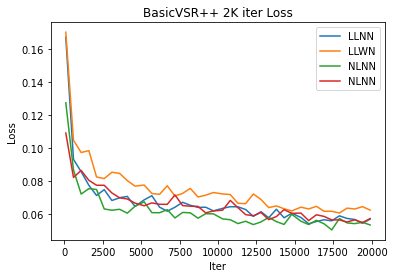

In [9]:
import matplotlib.pyplot as plt
import matplotlib

record_llnn= readrecords(llnn)
record_llwn = readrecords(llwn)
record_nlnn= readrecords(nlnn)
record_nlwn = readrecords(nlwn)

num = 200
gap = 5
fig,axs = plt.subplots()
axs.plot(record_llnn["iter"][:num:gap],record_llnn["loss"][:num:gap],label="LLNN")
axs.plot(record_llwn["iter"][:num:gap],record_llwn["loss"][:num:gap],label="LLWN")
axs.plot(record_nlnn["iter"][:num:gap],record_nlnn["loss"][:num:gap],label="NLNN")
axs.plot(record_nlwn["iter"][:num:gap],record_nlwn["loss"][:num:gap],label="NLNN")
axs.legend()
axs.set_title("BasicVSR++ 2K iter Loss")
axs.set_xlabel("Iter")
axs.set_ylabel("Loss")

fig.savefig("..\\Images\\"+"BasicVSR++_2K_iter_Loss")


In [10]:
savepath = os.getcwd().split("\\")[:-1]
savepath.append("pltfig")
os.makedirs("\\".join(savepath))
savepath.append("BasicVSR++_10K_iter_Loss"+".png")
fig.savefig("\\".join(savepath))


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'd:\\mmediting\\pltfig'